# Data Science for Cycling #1 - How To Read GPX Strava Routes With Python
- Notebook 1/6
- Using alternate GPX importer `gpxcsv` instead of `gpxpy` to access gpx extentions like heartrate, cadence, etc. 
- Make sure to have `gpxcsv` installed:
<br>

```
pip install gpxcsv
```

- Let's import the libraries and tweak Matplotlib's default stylings:

In [1]:
# import gpxpy
# import gpxpy.gpx
from gpxcsv import gpxtolist

import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

- You can read GPX files with Python's context manager syntax:

In [2]:
# with open('../src_code/Zg288.gpx', 'r') as gpx_file:
#     gpx = gpxpy.parse(gpx_file)

# GPS samples here: https://github.com/gps-touring/sample-gpx
gpx_list = gpxtolist('demo.gpx')
gpx_df = pd.DataFrame(gpx_list)

- ~It's a specific GPX object:~
- It's a pandas data frame

In [3]:
# gpx

gpx_df.head()
#gpx_df

,lat,lon,power,hr,cad,name,type,ele,time
0,-16.857159,-151.482212,15.0,96.0,26.0,Virtual ride,17,17.7,2023-01-01T13:56:04Z
1,-16.857159,-151.482212,21.0,95.0,26.0,Virtual ride,17,17.7,2023-01-01T13:56:05Z
2,-16.857159,-151.482212,21.0,95.0,26.0,Virtual ride,17,17.7,2023-01-01T13:56:06Z
3,-16.857159,-151.482212,21.0,94.0,26.0,Virtual ride,17,17.7,2023-01-01T13:56:07Z
4,-16.857159,-151.482212,32.0,94.0,34.0,Virtual ride,17,17.7,2023-01-01T13:56:08Z


- Get the number of data points (number of times geolocation was taken):

In [4]:
# gpx.get_track_points_no()
print("Number of gpx points in dataframe:", end = " ")
print(len(gpx_df))

Number of gpx points in dataframe: 1338


- Get the minimum and maximum altitudes:

In [5]:
# gpx.get_elevation_extremes()

# https://datascienceparichay.com/article/pandas-get-min-value-in-one-or-more-columns/
print("Min elevation:", end = " ")
print(gpx_df['ele'].min(0))

print("Max elevation:", end = " ")
print(gpx_df['ele'].max(0))



Min elevation: 14.6
Max elevation: 21.6


In [6]:
# if such columns exisd in DataFrame, if not - comment this lines 
print("Min heartrate:", end = " ")
print(gpx_df['hr'].min(0))

print("Max heartrate:", end = " ")
print(gpx_df['hr'].max(0))

print("Min cadence:", end = " ")
print(gpx_df['cad'].min(0))

print("Max cadence:", end = " ")
print(gpx_df['cad'].max(0))

Min heartrate: 94.0
Max heartrate: 182.0
Min cadence: 25.0
Max cadence: 86.0


- ~Get the number of meters of uphil and downhil ride~
- ~It's a roundtrip, so the numbers should be almost identical~
- todo this

In [7]:
# gpx.get_uphill_downhill()

- You can dump the entire GPX file to XML
- Here are the first 1000 characters:

In [8]:
gpx_df.to_xml()[:1000]

"<?xml version='1.0' encoding='utf-8'?>\n<data>\n  <row>\n    <index>0</index>\n    <lat>-16.857159</lat>\n    <lon>-151.482212</lon>\n    <power>15.0</power>\n    <hr>96.0</hr>\n    <cad>26.0</cad>\n    <name>Virtual ride</name>\n    <type>17</type>\n    <ele>17.7</ele>\n    <time>2023-01-01T13:56:04Z</time>\n  </row>\n  <row>\n    <index>1</index>\n    <lat>-16.857159</lat>\n    <lon>-151.482212</lon>\n    <power>21.0</power>\n    <hr>95.0</hr>\n    <cad>26.0</cad>\n    <name>Virtual ride</name>\n    <type>17</type>\n    <ele>17.7</ele>\n    <time>2023-01-01T13:56:05Z</time>\n  </row>\n  <row>\n    <index>2</index>\n    <lat>-16.857159</lat>\n    <lon>-151.482212</lon>\n    <power>21.0</power>\n    <hr>95.0</hr>\n    <cad>26.0</cad>\n    <name>Virtual ride</name>\n    <type>17</type>\n    <ele>17.7</ele>\n    <time>2023-01-01T13:56:06Z</time>\n  </row>\n  <row>\n    <index>3</index>\n    <lat>-16.857159</lat>\n    <lon>-151.482212</lon>\n    <power>21.0</power>\n    <hr>94.0</hr>\n  

<br>

## Basic analysis
- There's only one track available in the file

In [9]:
# gpx.tracks[0]

# https://practicaldatascience.co.uk/data-science/how-to-identify-and-count-unique-values-in-pandas
#gpx_df['name'].unique()

# If there are multiple tracks or segments in a file, dataframe will have a column for it
print("Number of gpx tracks in file:", end = " ")
print(gpx_df['name'].nunique())

Number of gpx tracks in file: 1


- Access it with Python's list indexing syntax:

In [10]:
if 'name' in gpx_df:
    track_name_list = gpx_df['name'].unique().tolist()
    print("List of track names:", end=" ")
    print(track_name_list)
else:
    print("No tracks in DataFrame")
    track_name_list = []

List of track names: ['Virtual ride']


In [11]:
if 'trkseg' in gpx_df:
    segment_name_list = gpx_df['trkseg'].unique().tolist()
    print("List of segment names:", end=" ")
    print(segment_name_list)
else:
    print("No segments in DataFrame")
    segment_name_list = []

No segments in DataFrame


In [12]:
# gpx.tracks[0].segments[0]

# *Not a propper way to separate tracks*
# get all data points which have a track name equal to first in a list of track names
if (len(track_name_list) > 0 ):
    first_track = gpx_df.loc[gpx_df['name'] == track_name_list[0]]
else:
    #if no tracks found create empty dataframe
    first_track = pd.DataFrame()
if (len(segment_name_list) > 0):
    first_segment = gpx_df.loc[gpx_df['trkseg'] == segment_name_list[0]]
else:
    #if no segments found create empty dataframe
    first_segment = pd.DataFrame()

- ~The track has only one segment - access it the same way:~

- Number of data points in track 
- Number of data points in segment

In [13]:
print("Number of data points in first track:", end = " ")
print(len(first_track))
print("Number of data points in first segment:", end = " ")
print(len(first_segment))

Number of data points in first track: 1338
Number of data points in first segment: 0


In [14]:
# gpx.tracks[0].segments[0].points[:10]
first_track.head()


,lat,lon,power,hr,cad,name,type,ele,time
0,-16.857159,-151.482212,15.0,96.0,26.0,Virtual ride,17,17.7,2023-01-01T13:56:04Z
1,-16.857159,-151.482212,21.0,95.0,26.0,Virtual ride,17,17.7,2023-01-01T13:56:05Z
2,-16.857159,-151.482212,21.0,95.0,26.0,Virtual ride,17,17.7,2023-01-01T13:56:06Z
3,-16.857159,-151.482212,21.0,94.0,26.0,Virtual ride,17,17.7,2023-01-01T13:56:07Z
4,-16.857159,-151.482212,32.0,94.0,34.0,Virtual ride,17,17.7,2023-01-01T13:56:08Z


In [15]:
first_segment.head()

""


- ~Here are the first 10:~
- Here are the first 5:

- Let's now extract all dat apoints
- Store latitude, longitude, and elevation as a list of dicts

In [16]:
# route_info = []

# for track in gpx.tracks:
#     for segment in track.segments:
#         for point in segment.points:
#             route_info.append({
#                 'latitude': point.latitude,
#                 'longitude': point.longitude,
#                 'elevation': point.elevation
#             })


In [17]:
# route_info[:3]

- ~Convert it to Pandas DataFrame for faster and easier analysis~
- Already Pandas DataFrame

In [18]:
# route_df = pd.DataFrame(route_info)
# route_df.head()

- Save it to CSV for later use:

In [19]:
# route_df.to_csv('../data/route_df.csv', index=False)
gpx_df.to_csv('route_df.csv', index=False)

<br>

## Basic visualization
- You can use matplotlib to visualize all data points
- It won't show the map, but you should still see how the route looks like:

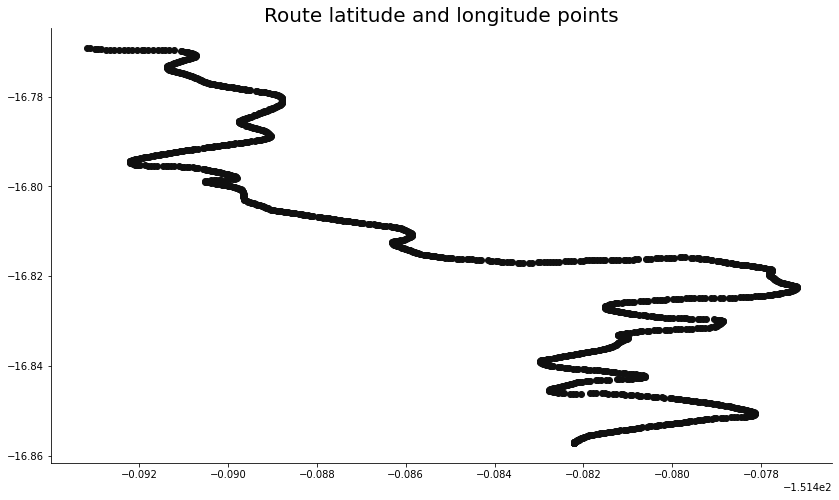

In [20]:
plt.figure(figsize=(14, 8))
plt.scatter(gpx_df['lon'], gpx_df['lat'], color='#101010')
plt.title('Route latitude and longitude points', size=20);

- You'll see in the following notebook how to visualize the route on a map with Folium